In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import isodate

In [2]:
df = pd.read_csv("fligh_price_100k_processed.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   legId                                10000 non-null  object 
 1   searchDate                           10000 non-null  object 
 2   flightDate                           10000 non-null  object 
 3   startingAirport                      10000 non-null  object 
 4   destinationAirport                   10000 non-null  object 
 5   fareBasisCode                        10000 non-null  object 
 6   travelDuration                       10000 non-null  float64
 7   elapsedDays                          10000 non-null  int64  
 8   isBasicEconomy                       10000 non-null  bool   
 9   isRefundable                         10000 non-null  bool   
 10  isNonStop                            10000 non-null  bool   
 11  totalFare                    

In [3]:
# The data set gives information about flights including:
# - legId: An identifier for the flight.
# - searchDate: The date (YYYY-MM-DD) on which this entry was taken
# from Expedia.
# - flightDate: The date (YYYY-MM-DD) of the flight.
# - startingAirport: Three-character IATA airport code for
# the initial location.
# - destinationAirport: Three-character IATA airport code for the
# arrival location.
# - fareBasisCode: The fare basis code.
# - travelDuration: The travel duration in hours and minutes.
# - elapsedDays: The number of elapsed days (usually 0).
# - isBasicEconomy: Boolean for whether the ticket is for
# basic economy.
# - isRefundable: Boolean for whether the ticket is refundable.
# - isNonStop: Boolean for whether the flight is non-stop.
# - baseFare: The price of the ticket (in USD).
# - totalFare: The price of the ticket (in USD) including taxes
# and other fees.
# - seatsRemaining: Integer for the number of seats remaining.
# - totalTravelDistance: The total travel distance in miles. This
# data is sometimes missing.
# - segmentsDepartureTimeEpochSeconds: String containing the
# departure time (Unix time) for each leg of the trip. The entries
# for each of the legs are separated by '||'.
# - segmentsDepartureTimeRaw: String containing the departure time
#  (ISO 8601 format: YYYY-MM-DDThh:mm:ss.000±[hh]:00) for each leg
# of the trip. The entries for each of the legs are separated by '||'.
# - segmentsArrivalTimeEpochSeconds: String containing the
# arrival time (Unix time) for each leg of the trip. The
# entries for each of the legs are separated by '||'.
# - segmentsArrivalTimeRaw: String containing the arrival time
#  (ISO 8601 format: YYYY-MM-DDThh:mm:ss.000±[hh]:00) for each
# leg of the trip. The entries for each of the legs are separated
# by '||'.
# - segmentsArrivalAirportCode: String containing the IATA
# airport code for the arrival location for each leg of the
#  trip. The entries for each of the legs are separated by '||'.
# - segmentsDepartureAirportCode: String containing the IATA
# airport code for the departure location for each leg of the
# trip. The entries for each of the legs are separated by '||'.
# - segmentsAirlineName: String containing the name of the airline
#  that services each leg of the trip. The entries for each of the
#  legs are separated by '||'.
# - segmentsAirlineCode: String containing the two-letter airline
#  code that services each leg of the trip. The entries for each
# of the legs are separated by '||'.
# - segmentsEquipmentDescription: String containing the type of
#  airplane used for each leg of the trip (e.g. "Airbus A321" or
# "Boeing 737-800"). The entries for each of the legs are separated
#  by '||'.
# - segmentsDurationInSeconds: String containing the duration
# of the flight (in seconds) for each leg of the trip. The
# entries for each of the legs are separated by '||'.
# - segmentsDistance: String containing the distance traveled
#  (in miles) for each leg of the trip. The entries for each of
# the legs are separated by '||'.
# - segmentsCabinCode: String containing the cabin for each
# leg of the trip (e.g. "coach"). The entries for each of the
# legs are separated by '||'.

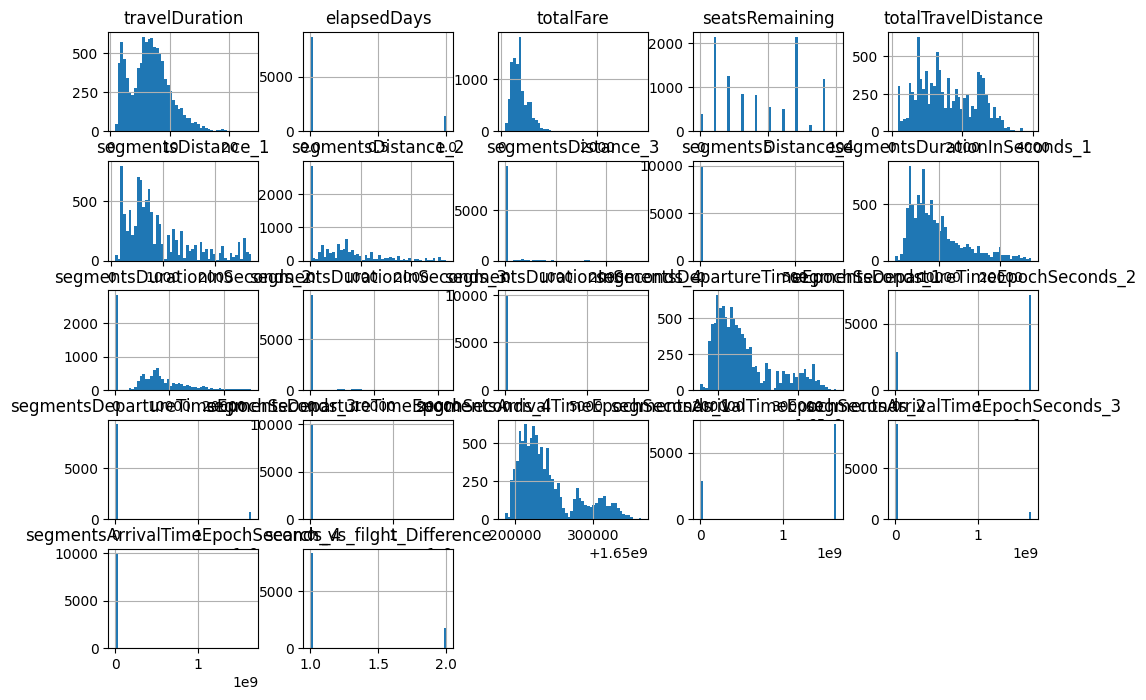

In [4]:
# Plot histogram of numerical features
df.hist(bins=50, figsize=(12, 8))
plt.show()

In [ ]:
# The frequency distributions of baseFare, totalFare, and totalTravel Distance are
# slightly right skwed, so we might need to use log transformation to improve it.

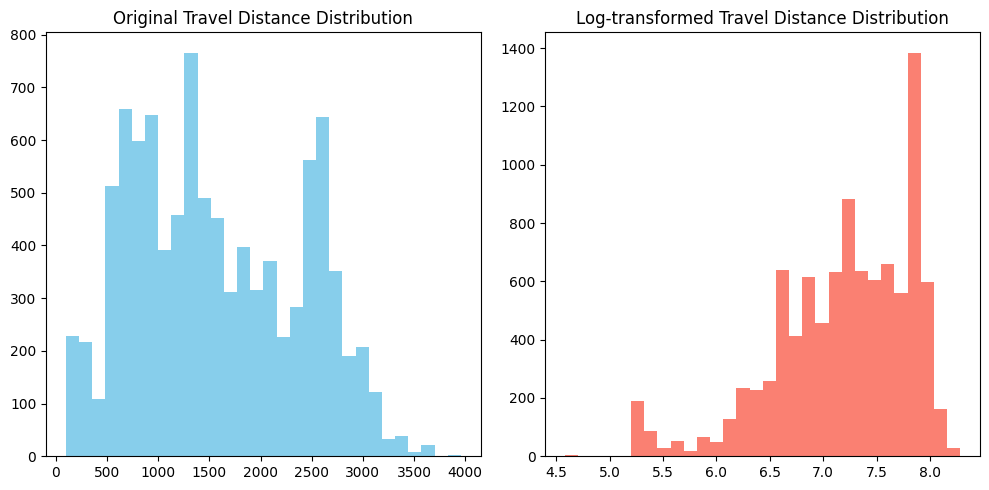

In [8]:
# Applying log transformatio
df['log_trav_dist'] = np.log(df['totalTravelDistance'] + 1)  # Adding 1 to avoid log(0)


# Plotting
plt.figure(figsize=(10, 5))

# Original Data
plt.subplot(1, 2, 1)
plt.hist(df['totalTravelDistance'], bins=30, color='skyblue')
plt.title('Original Travel Distance Distribution')

# Log-transformed Data
plt.subplot(1, 2, 2)
plt.hist(df['log_trav_dist'], bins=30, color='salmon')
plt.title('Log-transformed Travel Distance Distribution')

plt.tight_layout()
plt.show()

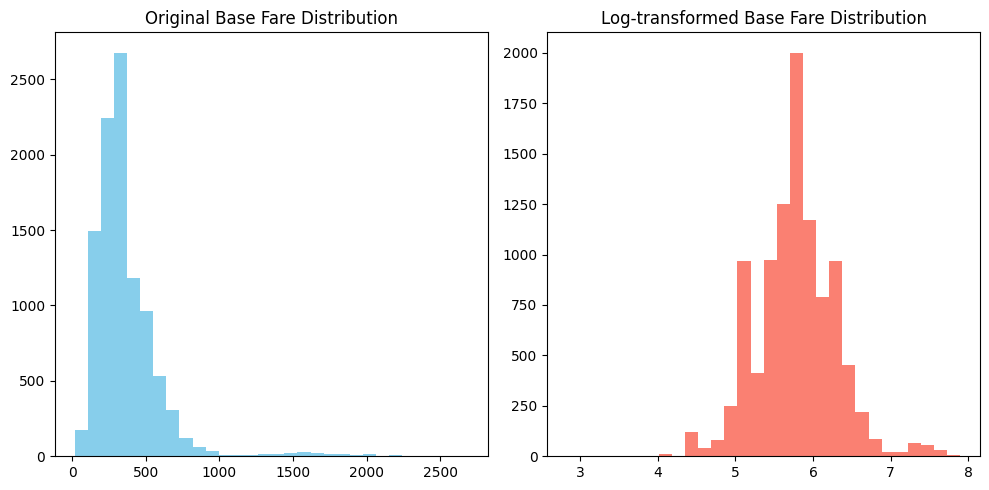

In [9]:
# Applying log transformation
df['log_base_fare'] = np.log(df['baseFare'] + 1)  # Adding 1 to avoid log(0)


# Plotting
plt.figure(figsize=(10, 5))

# Original Data
plt.subplot(1, 2, 1)
plt.hist(df['baseFare'], bins=30, color='skyblue')
plt.title('Original Base Fare Distribution')

# Log-transformed Data
plt.subplot(1, 2, 2)
plt.hist(df['log_base_fare'], bins=30, color='salmon')
plt.title('Log-transformed Base Fare Distribution')

plt.tight_layout()
plt.show()

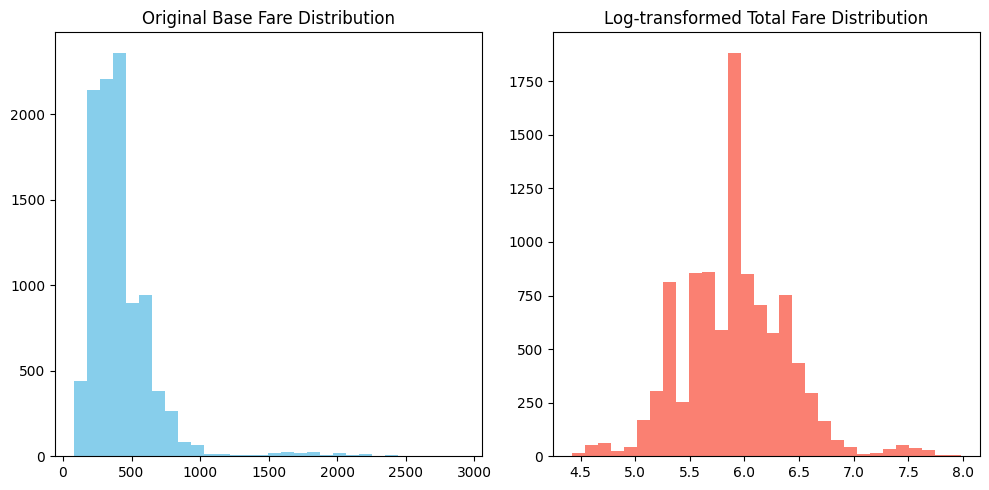

In [10]:
# Applying log transformation
df['log_total_fare'] = np.log(df['totalFare'] + 1)  # Adding 1 to avoid log(0)


# Plotting
plt.figure(figsize=(10, 5))

# Original Data
plt.subplot(1, 2, 1)
plt.hist(df['totalFare'], bins=30, color='skyblue')
plt.title('Original Base Fare Distribution')

# Log-transformed Data
plt.subplot(1, 2, 2)
plt.hist(df['log_total_fare'], bins=30, color='salmon')
plt.title('Log-transformed Total Fare Distribution')

plt.tight_layout()
plt.show()

In [ ]:
# After visualize the log transformation, we can clearly see the big improvement
# in term of bell shape

In [17]:
# Correlations
corr_matrix = df.corr()
corr_matrix["totalFare"].sort_values(ascending=False)

/tmp/ipykernel_2527633/1634486351.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


totalFare                              1.000000
travelDuration                         0.275293
segmentsDurationInSeconds_3            0.261373
segmentsArrivalTimeEpochSeconds_3      0.259584
segmentsDepartureTimeEpochSeconds_3    0.259584
totalTravelDistance                    0.254754
segmentsDistance_3                     0.243384
segmentsDurationInSeconds_1            0.142064
segmentsDistance_1                     0.141213
elapsedDays                            0.120010
segmentsDistance_2                     0.107630
segmentsDurationInSeconds_2            0.099965
segmentsArrivalTimeEpochSeconds_2      0.093528
segmentsDepartureTimeEpochSeconds_2    0.093528
segmentsArrivalTimeEpochSeconds_4      0.062679
segmentsDepartureTimeEpochSeconds_4    0.062679
segmentsDurationInSeconds_4            0.062218
segmentsDistance_4                     0.060219
isRefundable                          -0.005311
segmentsArrivalTimeEpochSeconds_1     -0.062693
segmentsDepartureTimeEpochSeconds_1   -0

/tmp/ipykernel_1867714/1983979222.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


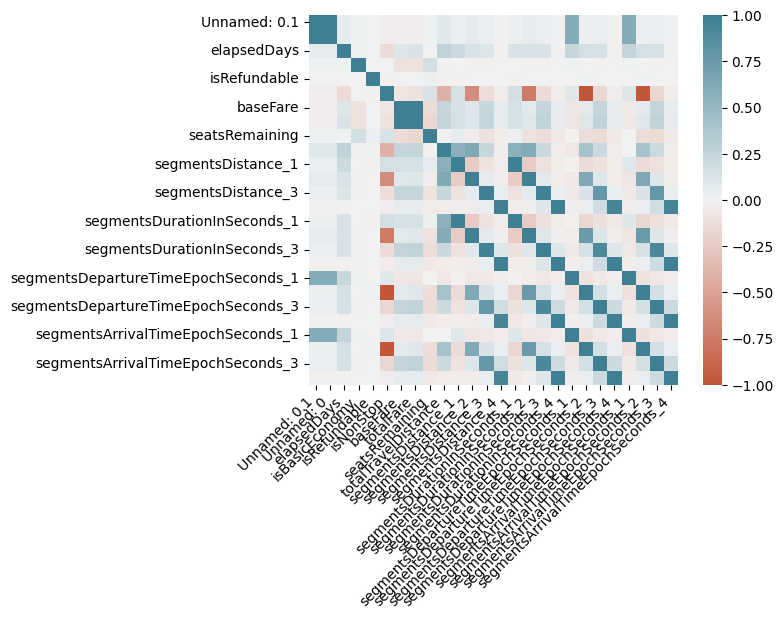

In [46]:
# Heat map to visulize correlations between variables

corr = df.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

/tmp/ipykernel_3954699/2393145904.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_counts = top_10.append(pd.Series({'Other': other}))


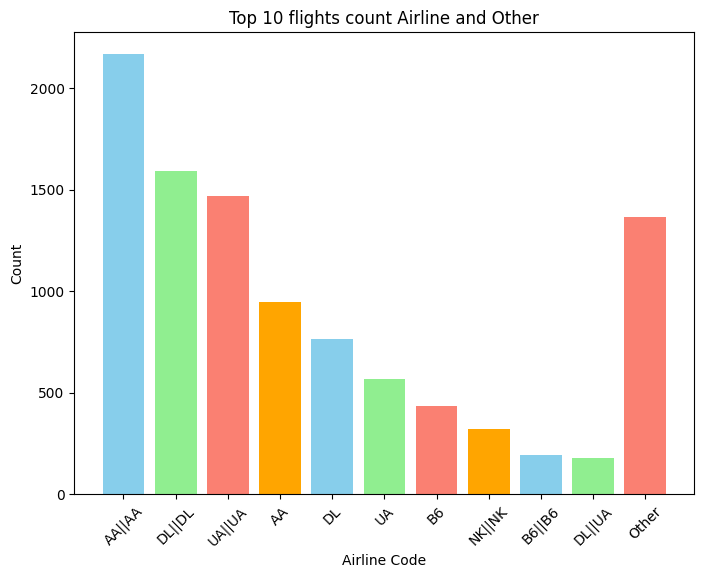

In [17]:
# Count the occurrences of each category
category_counts = df['segmentsAirlineCode'].value_counts()

# Keep the top 10 and sum the rest into 'Other'
top_10 = category_counts.nlargest(10)
other = category_counts.iloc[10:].sum()
final_counts = top_10.append(pd.Series({'Other': other}))

# print(final_counts)


# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(final_counts.index, final_counts.values, color=['skyblue', 'lightgreen', 'salmon', 'orange'])

plt.title('Top 10 flights count Airline and Other')
plt.xlabel('Airline Code')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels if they're long or to improve readability
plt.show()



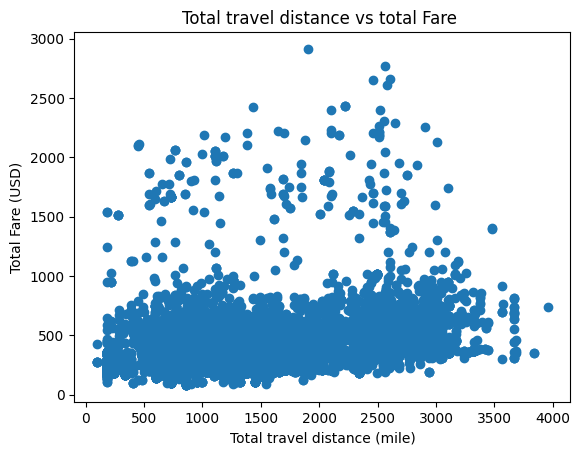

In [18]:
# Plot scatter plot to visulize correlation between total travel distance vs totaFare
trav_dist = df["totalTravelDistance"]
total_fare = df["totalFare"]
plt.scatter(trav_dist, total_fare)
plt.xlabel('Total travel distance (mile)')
plt.ylabel('Total Fare (USD)')
plt.title('Total travel distance vs total Fare ')
plt.show()

In [ ]:
# The data set has only 5 numerical columns. The rest of it (22 columns) are
# categorical values. There are some numerical columns represented in string
# format such as segmentsDepartureTimeEpochSeconds,... However, since the formats
# of these columns are quite complicated, we will drop them to run the algorithm
# smoothly and will comeback to process if we have time to do that
